Num GPUs Available:  1
GPU is available, using GPU for training.
Found 19858 images belonging to 2 classes.
Found 3504 images belonging to 2 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                             

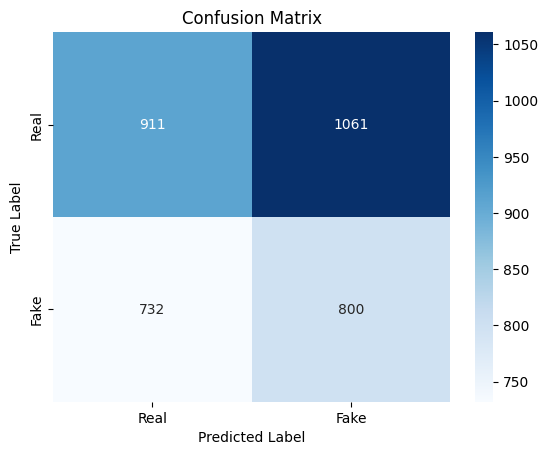

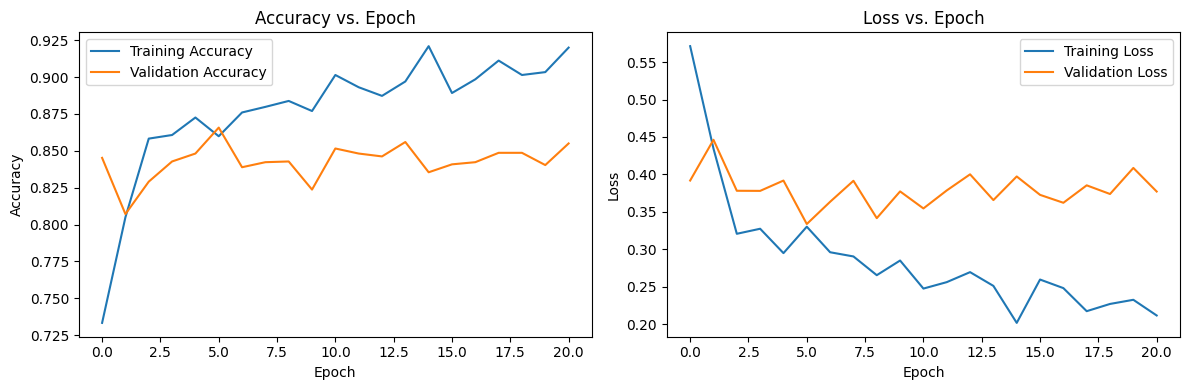

Found 7510 images belonging to 2 classes.
470/470 [==============================] - 111s 235ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.98      0.92      0.95      3789
        Fake       0.92      0.98      0.95      3721

    accuracy                           0.95      7510
   macro avg       0.95      0.95      0.95      7510
weighted avg       0.95      0.95      0.95      7510

Confusion Matrix:
[[3470  319]
 [  67 3654]]


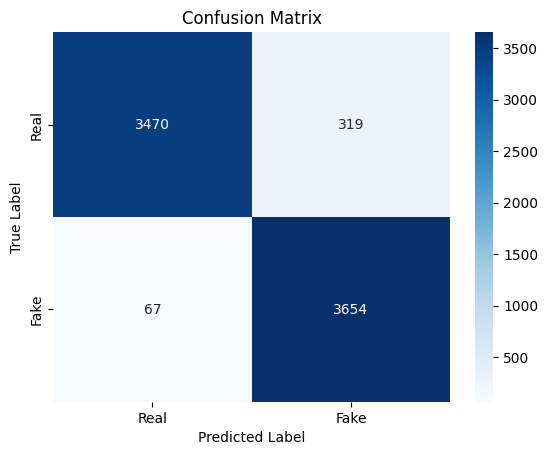

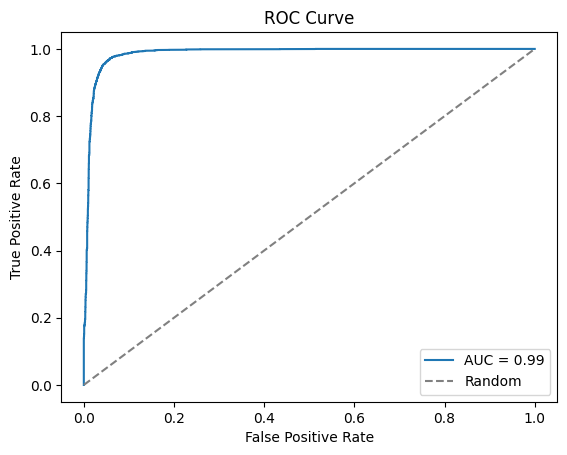

Evaluation Metrics:
accuracy: 0.9486018641810918
precision: 0.9810573932711337
recall: 0.9158089205595144
f1_score: 0.9473109473109473
auc: 0.9865033500204873
Сообщение об окончании работы отправлено в Telegram.
Программа завершила работу.


In [2]:
import model_fit_evaluate  
from tensorflow.keras.applications import ResNet50V2, InceptionV3, EfficientNetB2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_input_resnet50v2
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_input_inceptionv3
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnetb2
import tensorflow as tf
import os
import telebot


if __name__ == '__main__':
    # 0. Config
    data_dir = 'train'
    image_size = (224, 224)
    batch_size = 4 
    epochs = 40

    train_generator, validation_generator = model_fit_evaluate.create_data_generators(data_dir, image_size, batch_size, preprocessing_function=preprocess_input_resnet50v2)

    model = model_fit_evaluate.create_custom_model(
    base_model=ResNet50V2,
    weights="imagenet", 
    input_shape=(224, 224, 3),  
    num_classes=1, 
    trainable_base=True 
    )

    # Train Model
    history = model_fit_evaluate.train_model(model, train_generator, validation_generator, epochs, batch_size, early_stopping_patience=6, reduce_lr_patience=3, reduce_lr_factor=0.7)

    # Evaluate Model
    model_fit_evaluate.evaluate_model(model, validation_generator)

    # Plot Training History
    model_fit_evaluate.plot_training_history(history)
    
    test_data_dir = 'test' 

    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, test_data_dir, preprocess_input_resnet50v2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Found 10110 images belonging to 2 classes.
632/632 [==============================] - 73s 115ms/step
[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.93      0.59      0.72      5089
        Fake       0.70      0.96      0.81      5021

    accuracy                           0.77     10110
   macro avg       0.82      0.77      0.76     10110
weighted avg       0.82      0.77      0.76     10110

Confusion Matrix:
[[3000 2089]
 [ 214 4807]]


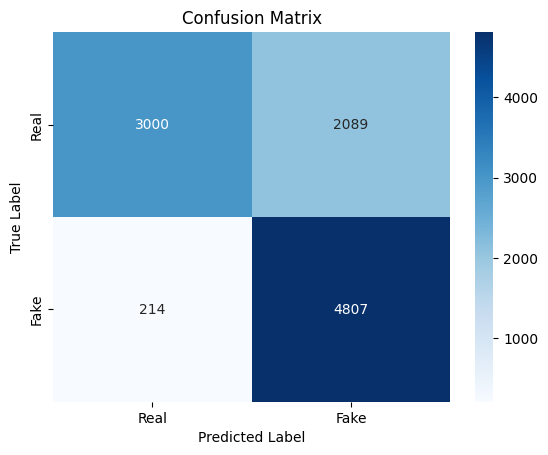

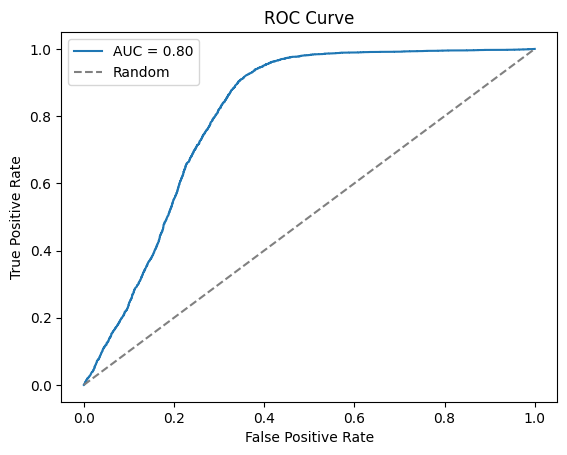

Evaluation Metrics:
accuracy: 0.7722057368941642
precision: 0.9334163036714375
recall: 0.5895067793279622
f1_score: 0.7226303745634108
auc: 0.8045411081279418


In [7]:
    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, 'OF/test', preprocess_input_resnet50v2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

In [4]:
model.save('ResNetV2_Deepfake.keras')